# Import Data

In [86]:
import pandas as pd
import numpy as np
from scipy import stats

In [87]:
import pandas as pd

# Load the dataset from the text file
df_txt = pd.read_csv('electricity.txt', sep=';', low_memory=False)

# Save the dataframe to a CSV file
df_txt.to_csv('household_power_consumption.csv', index=False)


# Data Preprocessing

In [88]:
import pandas as pd
import numpy as np
from scipy import stats

In [89]:
# Load the dataset from the CSV file
df = pd.read_csv('household_power_consumption.csv')

In [90]:
# Combine 'Date' and 'Time' columns into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [91]:
# Set the datetime column as the index
df.set_index('Datetime', inplace=True)

In [92]:
# Drop the original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [93]:
# Convert all columns to numeric, forcing any non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [94]:
# Handle missing values by filling them with the mean of the respective column
df.fillna(df.mean(), inplace=True)

In [95]:
# Detect and handle outliers using the Z-score method
z_scores = np.abs(stats.zscore(df))

In [96]:
# Define a threshold for identifying outliers
threshold = 3

In [97]:
# Replace outliers with the median of the respective column
df[(z_scores > threshold)] = np.nan
df.fillna(df.median(), inplace=True)

In [98]:
# Display the first few rows of the cleaned dataframe
print(df.head())

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.106   233.29   
2006-12-16 17:27:00                5.388                  0.106   233.74   
2006-12-16 17:28:00                3.666                  0.106   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00               5.4             0.0             1.0   
2006-12-16 17:26:00               5.4             0.0             2.0   
2006-12-16 17:27:00               5.4             0.0             1.0   
2006-12-16 17:28:00          

# Exploratory Data Analysis

In [99]:
# Resample the data to daily averages
daily_data = df.resample('D').mean()

In [100]:
import matplotlib.pyplot as plt

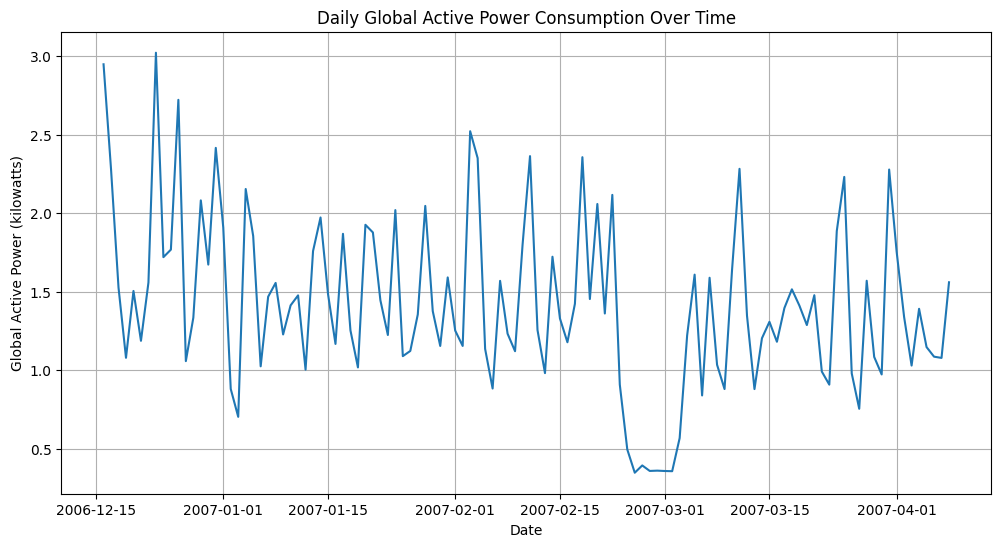

In [101]:
# Plot global active power over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Global_active_power'])
plt.title('Daily Global Active Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

In [102]:
import seaborn as sns

In [103]:
# Plot seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

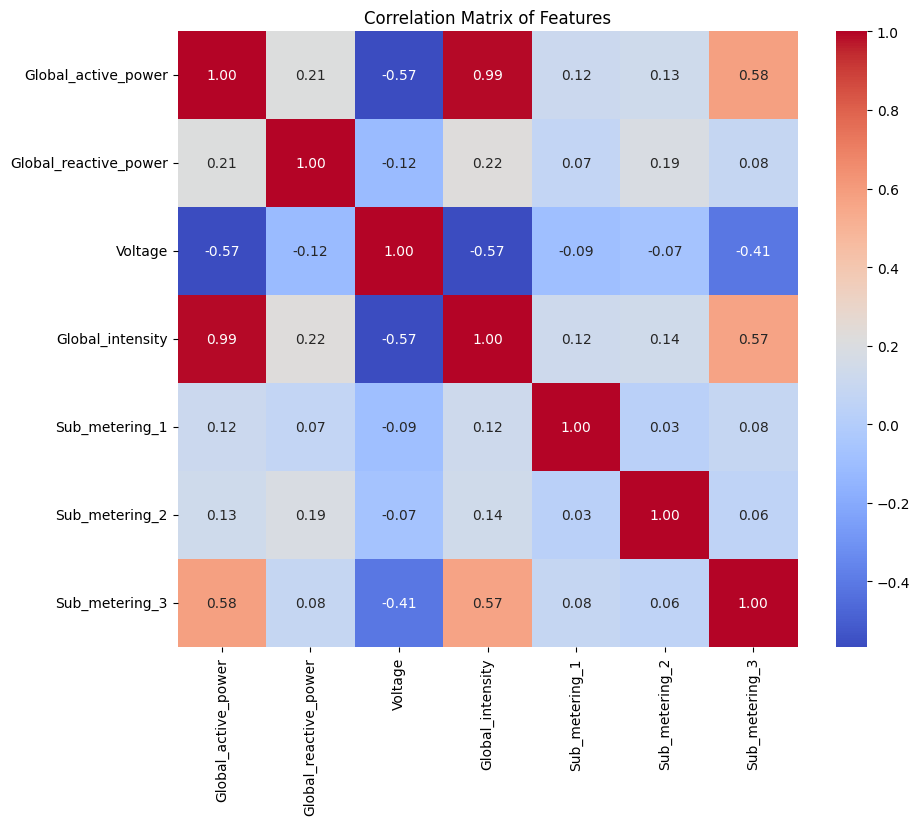

In [105]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

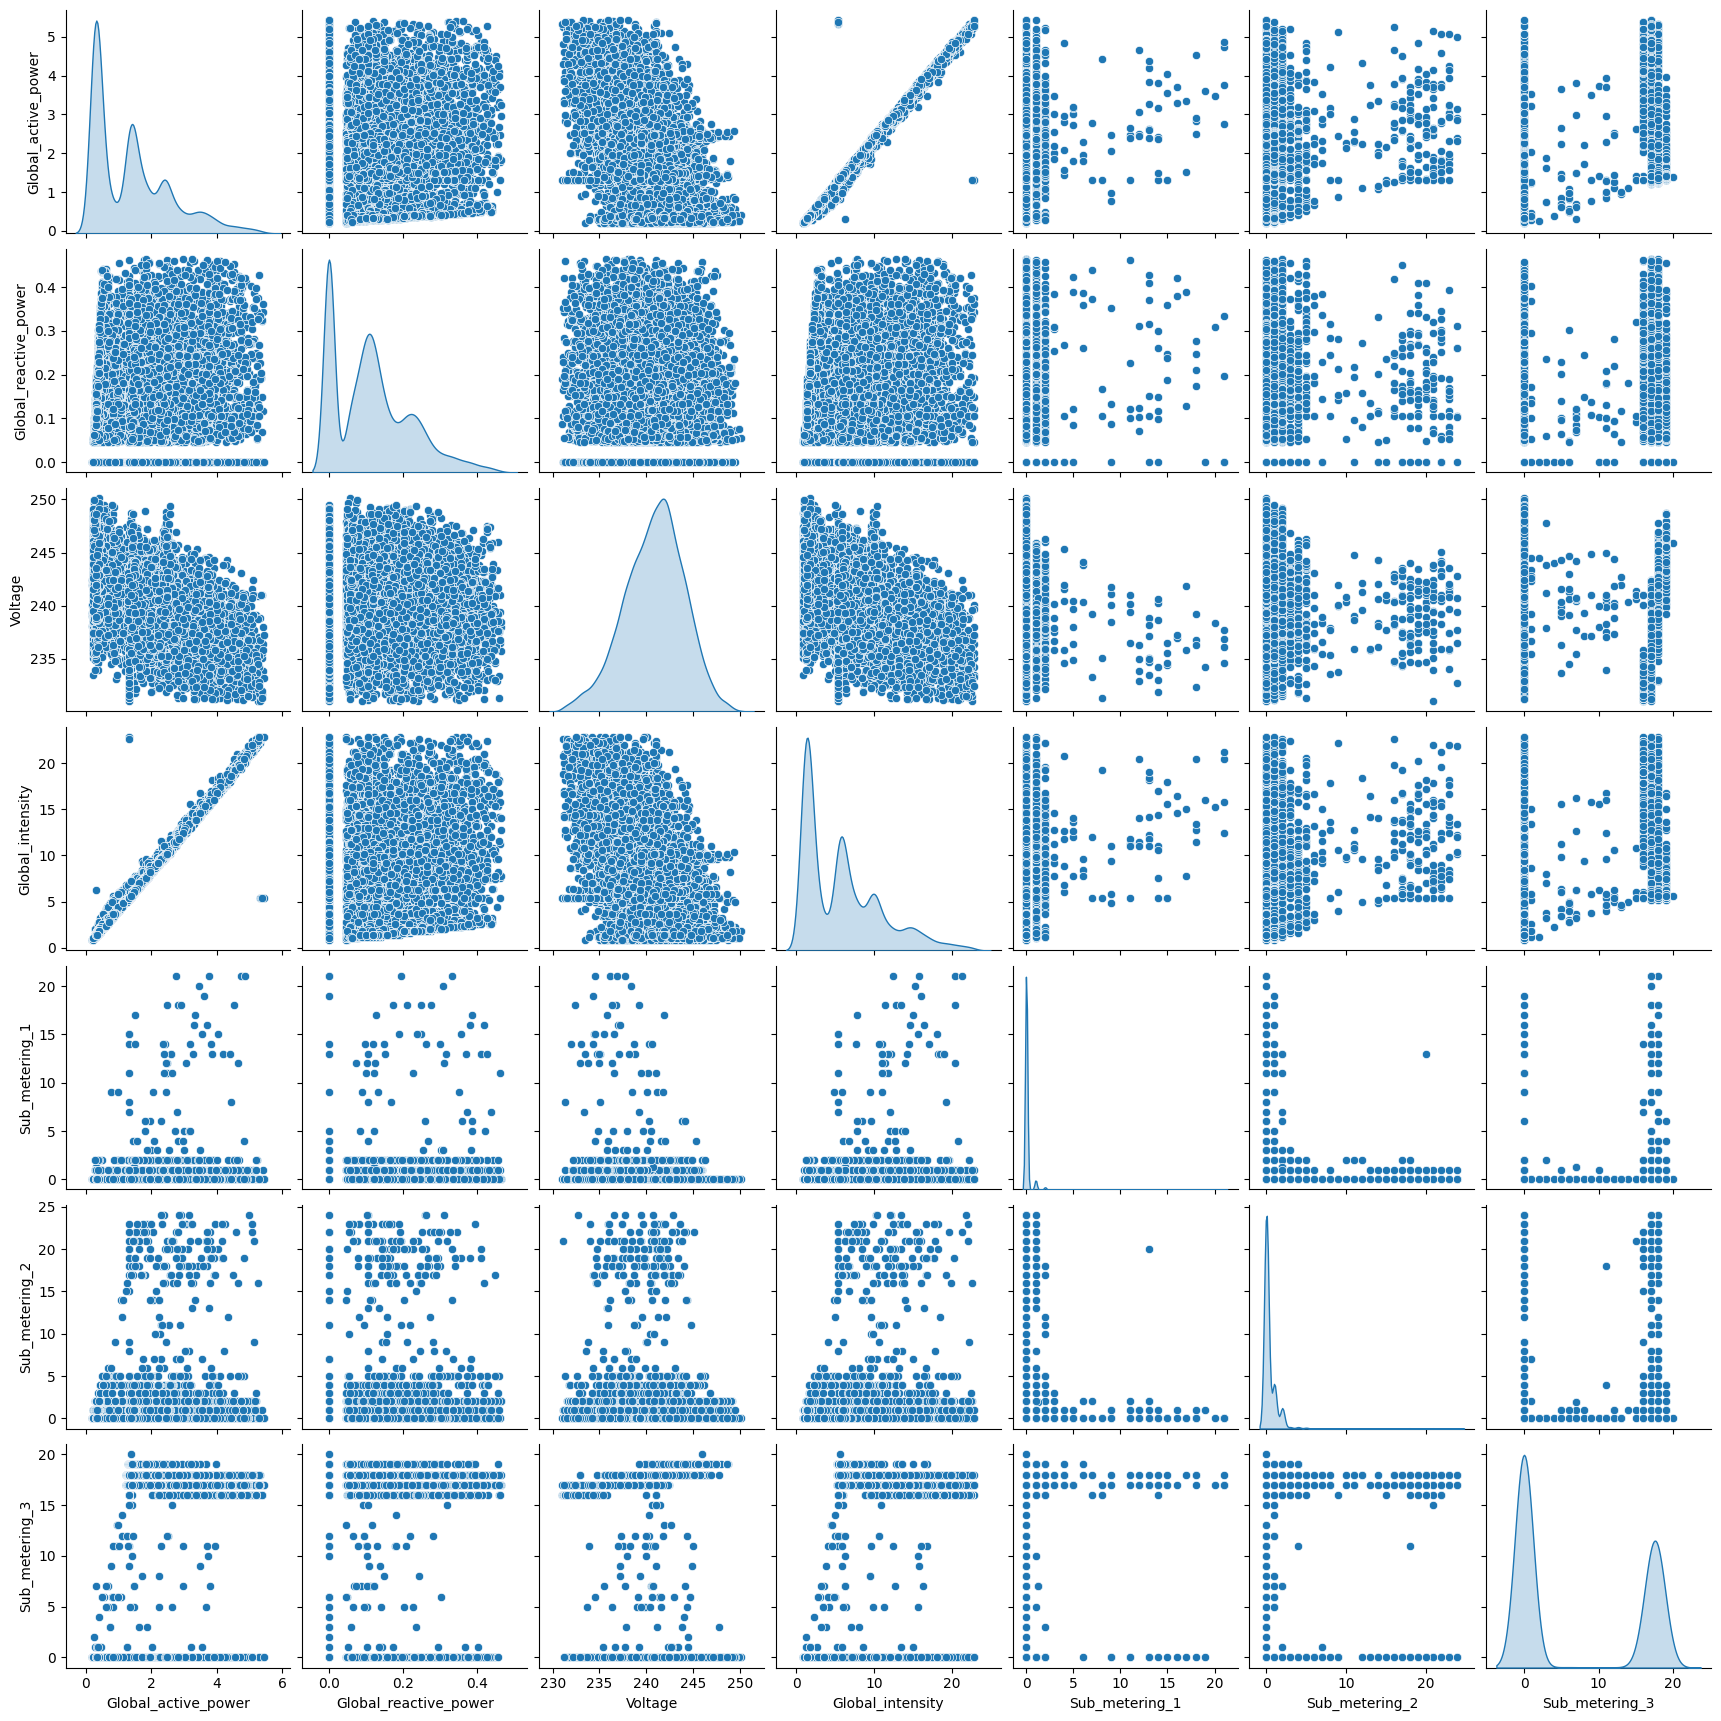

In [106]:
# Pairplot to visualize relationships between features
sampled_df = df.sample(frac=0.1, random_state=42)
sns.pairplot(sampled_df, diag_kind='kde')
plt.show()

# Time Series Forecasting Models

In [107]:
from statsmodels.tsa.arima_model import ARIMA

In [108]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [109]:
# Split the data into training and testing sets
train_data = daily_data[:'2010']
test_data = daily_data['2010':]

In [27]:
# Prepare data for LSTM
values = daily_data['Global_active_power'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

In [28]:
# Split the data into training and testing sets
train_size = int(len(scaled_values) * 0.8)
train, test = scaled_values[:train_size], scaled_values[train_size:]

In [29]:
# Function to create dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [30]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [31]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
89/89 - 3s - loss: 0.1126 - 3s/epoch - 28ms/step
Epoch 2/100
89/89 - 0s - loss: 0.0406 - 215ms/epoch - 2ms/step
Epoch 3/100
89/89 - 0s - loss: 0.0391 - 220ms/epoch - 2ms/step
Epoch 4/100
89/89 - 0s - loss: 0.0397 - 220ms/epoch - 2ms/step
Epoch 5/100
89/89 - 0s - loss: 0.0395 - 248ms/epoch - 3ms/step
Epoch 6/100
89/89 - 0s - loss: 0.0390 - 223ms/epoch - 3ms/step
Epoch 7/100
89/89 - 0s - loss: 0.0398 - 222ms/epoch - 2ms/step
Epoch 8/100
89/89 - 0s - loss: 0.0397 - 224ms/epoch - 3ms/step
Epoch 9/100
89/89 - 0s - loss: 0.0392 - 227ms/epoch - 3ms/step
Epoch 10/100
89/89 - 0s - loss: 0.0399 - 231ms/epoch - 3ms/step
Epoch 11/100
89/89 - 0s - loss: 0.0387 - 225ms/epoch - 3ms/step
Epoch 12/100
89/89 - 0s - loss: 0.0396 - 220ms/epoch - 2ms/step
Epoch 13/100
89/89 - 0s - loss: 0.0393 - 200ms/epoch - 2ms/step
Epoch 14/100
89/89 - 0s - loss: 0.0401 - 245ms/epoch - 3ms/step
Epoch 15/100
89/89 - 0s - loss: 0.0393 - 240ms/epoch - 3ms/step
Epoch 16/100
89/89 - 0s - loss: 0.0392 - 249ms/epoc

In [32]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [33]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [34]:
# Evaluate the model
train_score = mean_squared_error(y_train[0], train_predict[:, 0])
test_score = mean_squared_error(y_test[0], test_predict[:, 0])
print(f'Train Score (LSTM): {train_score}')
print(f'Test Score (LSTM): {test_score}')

Train Score (LSTM): 0.2686992640407977
Test Score (LSTM): 0.17839670592070173


In [35]:
# Plot the results
train_predict_plot = np.empty_like(scaled_values)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

In [36]:
test_predict_plot = np.empty_like(scaled_values)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_values) - 1, :] = test_predict

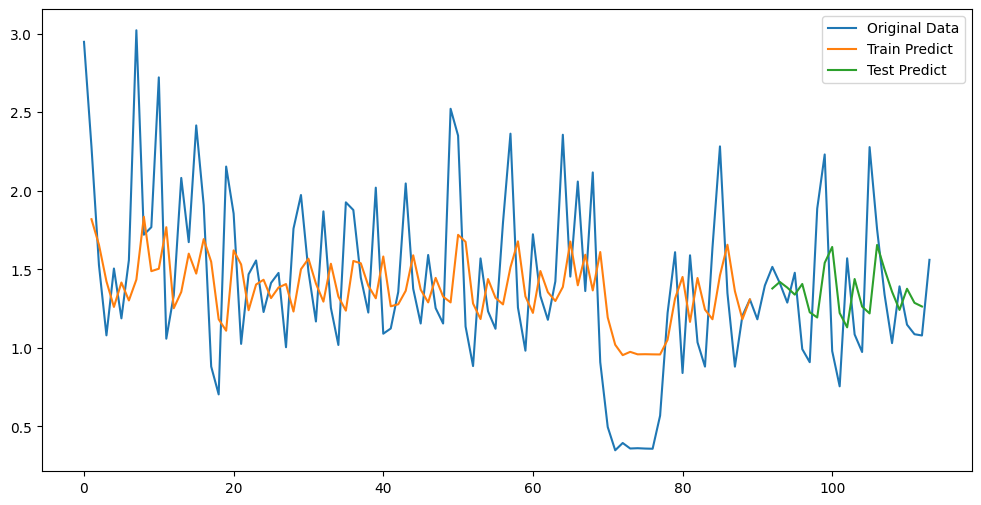

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_values), label='Original Data')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.legend()
plt.show()

# Feature Engineering

In [38]:
# Create new features based on 'Datetime'
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Day_of_Week'] = df.index.dayofweek

Text(0, 0.5, 'Global Active Power (kilowatts)')

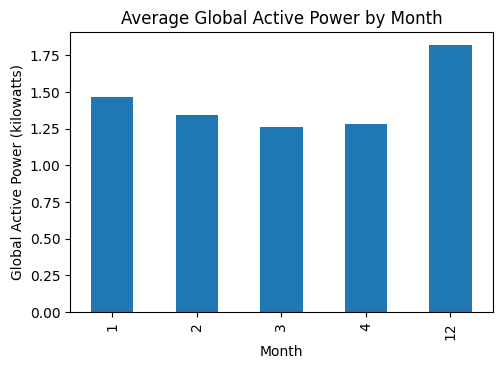

In [39]:
# Plot relationships between new features and global active power
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
df.groupby('Month')['Global_active_power'].mean().plot(kind='bar')
plt.title('Average Global Active Power by Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')

Text(0, 0.5, 'Global Active Power (kilowatts)')

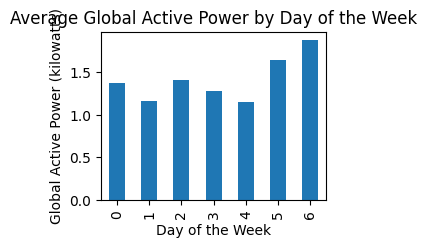

In [40]:
plt.subplot(2, 2, 2)
df.groupby('Day_of_Week')['Global_active_power'].mean().plot(kind='bar')
plt.title('Average Global Active Power by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Global Active Power (kilowatts)')

Text(0, 0.5, 'Global Active Power (kilowatts)')

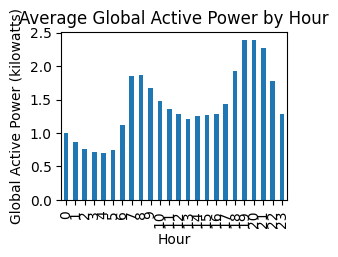

In [41]:
plt.subplot(2, 2, 3)
df.groupby('Hour')['Global_active_power'].mean().plot(kind='bar')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour')
plt.ylabel('Global Active Power (kilowatts)')

In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

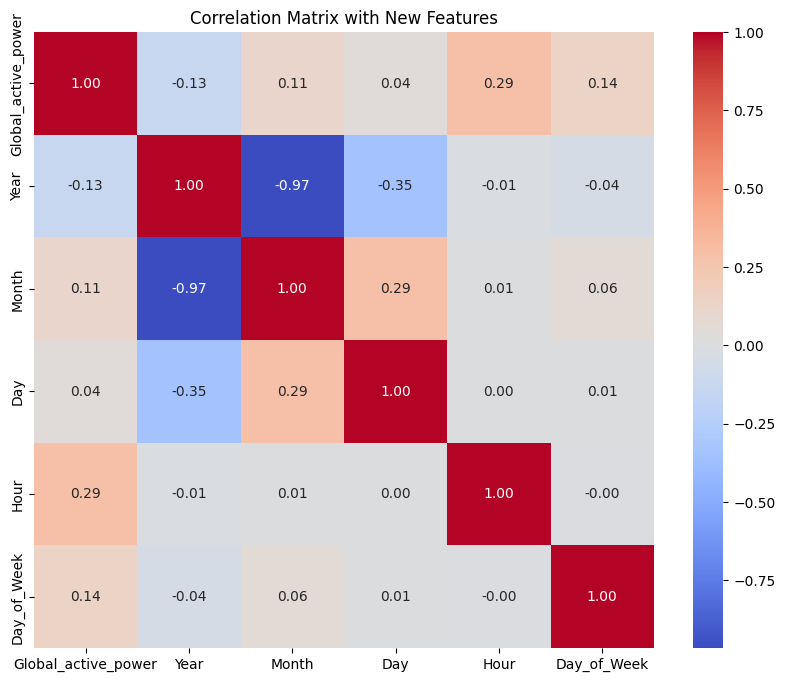

In [43]:
# Explore correlations with the new features
correlation_matrix = df[['Global_active_power', 'Year', 'Month', 'Day', 'Hour', 'Day_of_Week']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with New Features')
plt.show()

# Model Evaluation and Tuning

In [49]:
# Split the data into training and testing sets
train_data = daily_data[:'2010']
test_data = daily_data['2010':]

In [50]:
# Fine-tuning ARIMA model
best_aic = np.inf
best_order = None
best_mdl = None

In [51]:
pq_rng = range(5)
d_rng = range(2)

In [52]:
for p in pq_rng:
    for d in d_rng:
        for q in pq_rng:
            try:
                tmp_mdl = ARIMA(train_data['Global_active_power'], order=(p, d, q)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (p, d, q)
                    best_mdl = tmp_mdl
            except:
                continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

Best ARIMA order: (3, 0, 2) with AIC: 167.37031217710557


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
# Fit the ARIMA model
model = ARIMA(train_data['Global_active_power'], order=(5, 1, 0))
model_fit = model.fit()

In [61]:
# Ensure test_data is not empty before proceeding with making predictions
if not test_data.empty:
    # Make predictions
    start_idx = test_data.index[0]
    end_idx = test_data.index[-1]
    predictions = model_fit.forecast(steps=len(test_data), start=start_idx, end=end_idx)

    # Evaluate the model
    mse = mean_squared_error(test_data['Global_active_power'], predictions)
    print(f'Mean Squared Error (ARIMA): {mse}')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data['Global_active_power'], label='Train')
    plt.plot(test_data.index, test_data['Global_active_power'], label='Test')
    plt.plot(test_data.index, predictions, label='Predicted')
    plt.legend()
    plt.show()
else:
    print("Error: The test_data DataFrame is empty or does not contain valid data points.")

Error: The test_data DataFrame is empty or does not contain valid data points.


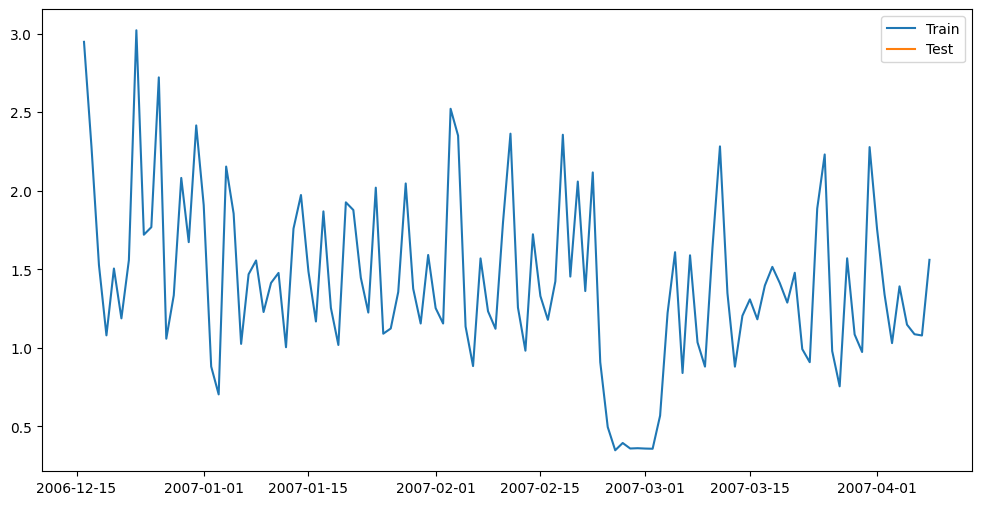

In [66]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Global_active_power'], label='Train')
plt.plot(test_data.index, test_data['Global_active_power'], label='Test')
# plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.show()

# Future Consumption prediction

In [69]:
# Function to make future predictions
def make_future_predictions(model, data, look_back, n_future):
    future_predictions = []
    last_data = data[-look_back:]
    for _ in range(n_future):
        input_data = last_data.reshape((1, look_back, 1))
        prediction = model.predict(input_data)[0][0]
        future_predictions.append(prediction)
        last_data = np.append(last_data[1:], prediction)
    return np.array(future_predictions)

# Generate future predictions for the next 30 days
n_future = 30
future_predictions = make_future_predictions(model, test[-look_back:], look_back, n_future)

1/1 [==============================] - 0s 38ms/step


In [74]:
# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

In [75]:
# Create a date range for the future predictions
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, inclusive='right')[1:]